In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms, datasets

try:
    from torchinfo import summary
except:
    !pip install -q torchinfo
    from torchinfo import summary

In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
import requests
import zipfile

from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)
        
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r")as zip_ref:
    zip_ref.extractall(image_path)
    
os.remove(data_path / "pizza_steak_sushi.zip")

In [5]:
train_dir=image_path / "train"
test_dir=image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [6]:
data_transform=transforms.Compose([
    
    #resize the images to 64x64
    transforms.Resize(size=(64,64)),
    
    # flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p= probability of flip
    
    # turn the image into a torch.Tensor
    transforms.ToTensor(), # this aslo convert all pixel value from 0to 255 to be between 0 and 1
    
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [7]:
# use ImageFolder to create datasets
train_data=datasets.ImageFolder(root=train_dir, # target folderof image
                                transform=data_transform, # 
                                target_transform=None)# transforms to perform on label (if necesary)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

In [8]:
# tur n train adn ttest datasets inot dataloaders
from torch.utils.data import DataLoader

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=1, # how many suprocess to usefor data loading?
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=1,
                           num_workers=1,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x795e4912da50>,
 <torch.utils.data.dataloader.DataLoader at 0x795e4912dd50>)

In [9]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [10]:
auto_transforms=weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [11]:
train_data=datasets.ImageFolder(root=train_dir, # target folderof image
                                transform=data_transform, # 
                                target_transform=None)# transforms to perform on label (if necesary)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

In [12]:
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=1, # how many suprocess to usefor data loading?
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=1,
                           num_workers=1,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x795d84600d90>,
 <torch.utils.data.dataloader.DataLoader at 0x795d845d76a0>)

In [13]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
model=torchvision.models.efficientnet_b0(weights).to(device)
model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [14]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [15]:
# freeze all base layers in the "features" section of the model
for param in model.features.parameters():
    param.requires_grad=False 

In [16]:
torch.manual_seed(29)

torch.cuda.manual_seed(29)

output_shape=3

model.classifier=torch.nn.Sequential(
    torch.nn.Dropout(p=0.2,inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)
).to(device)

In [17]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [18]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),
                          lr=0.01)

In [19]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc=0,0
    
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device), y.to(device)
        
        y_pred=model(X)
        
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
    
    # adjust metrics to get average loss and accuracy pre batch
    train_loss=train_loss / len(dataloader)
    train_acc=train_acc/ len(dataloader)
    
    return train_loss, train_acc

In [20]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):
    
    model.eval()
    
    test_loss, test_acc=0,0
    
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X,y=X.to(device), y.to(device)
            
            test_pred_logits=model(X)
            
            loss=loss_fn(test_pred_logits,y)
            test_loss+=loss.item()
            
            test_pred_labels=test_pred_logits.argmax(dim=1)
            test_acc+=((test_pred_labels==y).sum().item() / len(test_pred_labels))
            
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int=5):
    results={"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc=train_step(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer)
        test_loss, test_acc=test_step(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn)
        
        print(
            f"epoch+1 | " 
            f"train_loss: {train_loss} | "
            f"train_acc: {train_acc} | "            
            f"test_loss: {test_loss} | "
            f"test_acc: {test_acc} "
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [22]:
torch.manual_seed(29)
torch.cuda.manual_seed(29)

from timeit import default_timer as timer
start_time=timer()

results=train(model=model,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=5)
end_time=timer()
print(end_time-start_time)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch+1 | train_loss: 1.7528795914538204 | train_acc: 0.36 | test_loss: 21.326314434509694 | test_acc: 0.32 
epoch+1 | train_loss: 1.868733090783159 | train_acc: 0.35555555555555557 | test_loss: 35.771165221532165 | test_acc: 0.32 
epoch+1 | train_loss: 2.142281392069482 | train_acc: 0.40444444444444444 | test_loss: 53.736078842957575 | test_acc: 0.25333333333333335 
epoch+1 | train_loss: 2.0852581877085483 | train_acc: 0.38222222222222224 | test_loss: 12.303066741369628 | test_acc: 0.3466666666666667 
epoch+1 | train_loss: 2.0175679796530557 | train_acc: 0.38666666666666666 | test_loss: 22.99682502417705 | test_acc: 0.24 
20.946422758000153


In [23]:
from typing import Tuple, Dict, List
def plot_loss_curves(results:Dict[str,List[float]]):
    loss=results["train_loss"]
    test_loss=results["test_loss"]
    
    accuracy=results["train_acc"]
    test_accuracy=results["test_acc"]
    
    epochs=range(len(results["train_loss"]))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label="train_loss")
    plt.plot(epochs,test_loss,label="test_loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label="train_acc")
    plt.plot(epochs,test_accuracy,label="test_acc")
    plt.legend()

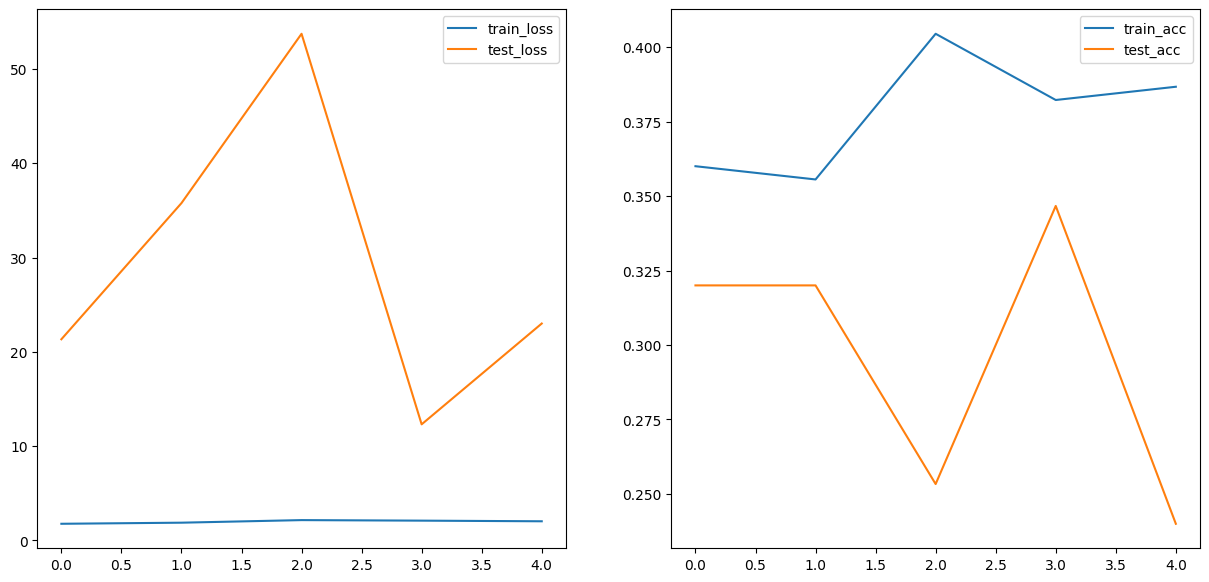

In [24]:

plot_loss_curves(results)

In [25]:
from PIL import Image

def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str],
                        image_size:Tuple[int, int],
                        transform:torchvision.transforms=None,
                        device:torch.device=device):
    img=Image.open(image_path)
    
    if transform is not None:
        image_transform=transform
    else:
        image_transform=transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
        
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        transformed_image=image_transform(img).unsqueeze(dim=0)
        
        target_image_pred=model(transformed_image.to(device))
        
    target_image_pred_probs=torch.softmax(target_image_pred,dim=1)
    
    target_image_pred_label=torch.argmax(target_image_pred_probs,dim=1)
    
    plt.figure()
    plt.imshow(img)
    plt.title(f"pred: {class_names[target_image_pred_label]} | prob: {target_image_pred_probs.max()}")
    plt.axis(False);
    


In [26]:
class_names=["pizza","sneak","sushi"]

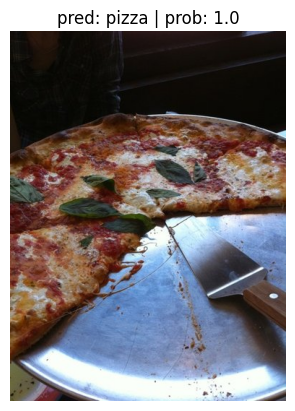

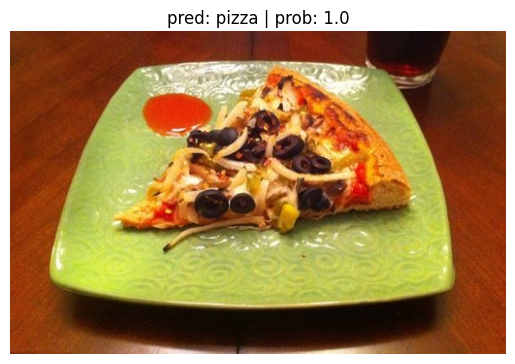

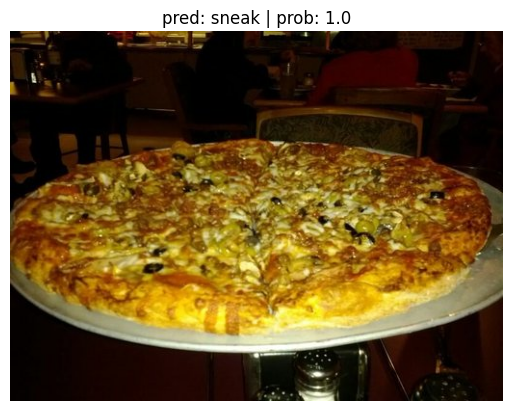

In [27]:
# get a random list of image paths from test set
import random
num_images_to_plot=3

test_image_path_list=list(Path(test_dir).glob("*/*.jpg"))
test_image_path_simple=random.sample(population=test_image_path_list,
                                     k=num_images_to_plot)

for image_path in test_image_path_list:
    if num_images_to_plot>0:
        pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224,224))
        num_images_to_plot=num_images_to_plot-1

exists


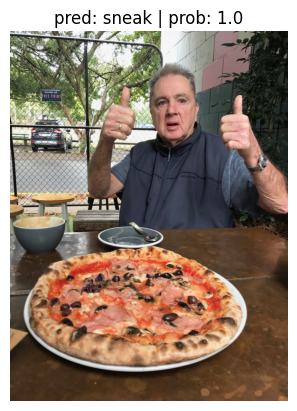

In [28]:
import requests

custom_image_path=data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path,"wb") as f:
        request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        f.write(request.content)
        
    
else:
    print("exists")
    
    
pred_and_plot_image(model=model,
                     image_path=custom_image_path,
                     class_names=class_names,
                     image_size=(224,224))

## 1] Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. Check out 03. PyTorch Computer Vision section 10 for ideas.


In [29]:


# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [30]:
model_e=torchvision.models.efficientnet_b0(pretrained=True).to(device)
model_e

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [31]:
for params in model_e.features.parameters():
    params.requires_grad=False

In [32]:
torch.manual_seed(29)
torch.cuda.manual_seed(29)

output_shape=len(class_names)

model_e.classifier=torch.nn.Sequential(
    torch.nn.Dropout(p=0.21,inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True) 
).to(device)

In [33]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_e.parameters(),lr=0.001)

In [34]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc=0,0
    
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device), y.to(device)
        
        y_pred=model(X)
        
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
    
    # adjust metrics to get average loss and accuracy pre batch
    train_loss=train_loss / len(dataloader)
    train_acc=train_acc/ len(dataloader)
    
    return train_loss, train_acc

In [35]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):
    
    model.eval()
    
    test_loss, test_acc=0,0
    
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X,y=X.to(device), y.to(device)
            
            test_pred_logits=model(X)
            
            loss=loss_fn(test_pred_logits,y)
            test_loss+=loss.item()
            
            test_pred_labels=test_pred_logits.argmax(dim=1)
            test_acc+=((test_pred_labels==y).sum().item() / len(test_pred_labels))
            
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    return test_loss, test_acc

In [36]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int=5):
    results={"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc=train_step(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer)
        test_loss, test_acc=test_step(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn)
        
        print(
            f"epoch+1 | " 
            f"train_loss: {train_loss} | "
            f"train_acc: {train_acc} | "            
            f"test_loss: {test_loss} | "
            f"test_acc: {test_acc} "
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [37]:
torch.manual_seed(29)
torch.cuda.manual_seed(29)

from timeit import default_timer as timer
start_time=timer()

results=train(model=model_e,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=20)
end_time=timer()
print(end_time-start_time)

  0%|          | 0/20 [00:00<?, ?it/s]

epoch+1 | train_loss: 1.1572139415476057 | train_acc: 0.4088888888888889 | test_loss: 3.9874323246604764 | test_acc: 0.28 
epoch+1 | train_loss: 1.1328358438279893 | train_acc: 0.36444444444444446 | test_loss: 5.27049133364053 | test_acc: 0.29333333333333333 
epoch+1 | train_loss: 1.1654936499065822 | train_acc: 0.3466666666666667 | test_loss: 4.5343573734681195 | test_acc: 0.21333333333333335 
epoch+1 | train_loss: 1.0869603763686286 | train_acc: 0.36 | test_loss: 3.029543803738969 | test_acc: 0.38666666666666666 
epoch+1 | train_loss: 1.0822887759738498 | train_acc: 0.40444444444444444 | test_loss: 4.767004954864581 | test_acc: 0.25333333333333335 
epoch+1 | train_loss: 1.066092165576087 | train_acc: 0.4444444444444444 | test_loss: 4.027082841388107 | test_acc: 0.30666666666666664 
epoch+1 | train_loss: 1.0978177735540602 | train_acc: 0.4177777777777778 | test_loss: 2.365284603119926 | test_acc: 0.37333333333333335 
epoch+1 | train_loss: 1.0298874599403804 | train_acc: 0.462222222222

In [38]:
test_preds=[]
model_e.eval()

with torch.inference_mode():
    for X,y in tqdm(test_dataloader):
        X, y= X.to(device), y.to(device)
        
        test_logits=model_e(X)
        
        pred_probs=torch.softmax(test_logits,dim=1)
        
        pred_labels=torch.argmax(pred_probs,dim=1)
        
        test_preds.append(pred_labels)
        
test_preds=torch.cat(test_preds).cpu()
test_preds

  0%|          | 0/75 [00:00<?, ?it/s]

tensor([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 0])

In [39]:
test_truth=torch.cat([y for X,y in test_dataloader])
test_truth

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2])

In [40]:
torch.manual_seed(29)
torch.cuda.manual_seed(29)

from timeit import default_timer as timer
start_time=timer()

results=train(model=model_e,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=5)
end_time=timer()
print(end_time-start_time)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch+1 | train_loss: 0.7702676593595081 | train_acc: 0.6888888888888889 | test_loss: 14.127532046961994 | test_acc: 0.26666666666666666 
epoch+1 | train_loss: 0.8197497861915165 | train_acc: 0.6844444444444444 | test_loss: 12.482379467988752 | test_acc: 0.32 
epoch+1 | train_loss: 0.8772111795677079 | train_acc: 0.6 | test_loss: 15.66442294237084 | test_acc: 0.25333333333333335 
epoch+1 | train_loss: 0.8540863306654825 | train_acc: 0.5955555555555555 | test_loss: 7.014748642199641 | test_acc: 0.30666666666666664 
epoch+1 | train_loss: 0.7945240365465482 | train_acc: 0.6444444444444445 | test_loss: 8.955712199737633 | test_acc: 0.24 
20.44406254999967


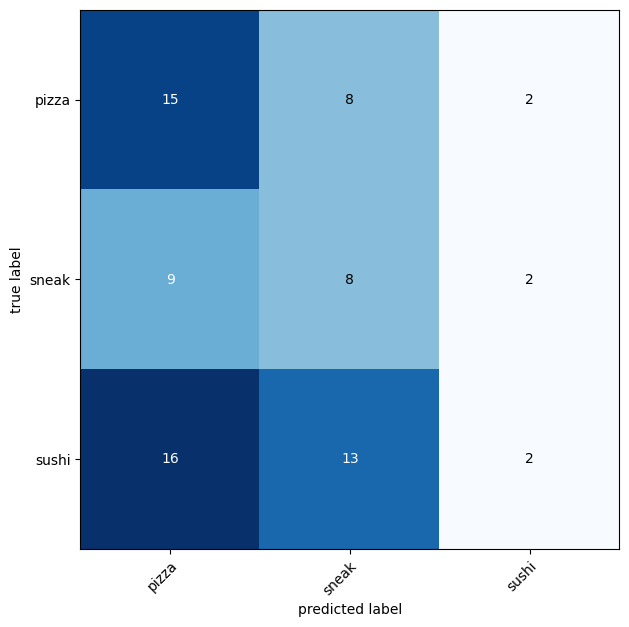

In [41]:


from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=test_preds,
                         target=test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
)
    

## 2] Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
- Predicting across all of the test dataset, storing the labels and predicted probabilities.
- Sort the predictions by wrong prediction and then descending predicted probabilities, this will give you the wrong predictions with the highest prediction probabilities, in other words, the "most wrong".
- Plot the top 5 "most wrong" images, why do you think the model got these wrong?

In [42]:
from pathlib import Path

test_data_paths=list(Path(test_dir).glob("*/*.jpg"))
test_labels=[path.parent.stem for path in test_data_paths]

def pred_and_store(test_paths, model, transform, class_names, device):
    test_pred_lst=[]
    for path in tqdm(test_paths):
        pred_dict={}
        
        pred_dict["image_path"]=path
        
        class_name=path.parent.stem
        pred_dict["class_name"]=class_name
        
        from PIL import Image
        img=Image.open(path)
        transformed_image=transform(img).unsqueeze(0)
        
        model.eval()
        with torch.inference_mode():
            pred_logit = model(transformed_image.to(device))
            pred_prob = torch.softmax(pred_logit, dim=1)
            pred_label = torch.argmax(pred_prob, dim=1)
            pred_class = class_names[pred_label.cpu()]

              # Make sure things in the dictionary are back on the CPU 
            pred_dict["pred_prob"] = pred_prob.unsqueeze(0).max().cpu().item()
            pred_dict["pred_class"] = pred_class

            # Does the pred match the true label?
            pred_dict["correct"] = class_name == pred_class

    # print(pred_dict)
    # Add the dictionary to the list of preds
    test_pred_lst.append(pred_dict)

    return test_pred_lst

    

In [43]:
test_pred_dicts = pred_and_store(test_paths=test_data_paths,
                                 model=model_e,
                                 transform=simple_transform,
                                 class_names=class_names,
                                 device=device)


  0%|          | 0/75 [00:00<?, ?it/s]

In [44]:
test_pred_dicts

[{'image_path': PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
  'class_name': 'sushi',
  'pred_prob': 1.0,
  'pred_class': 'pizza',
  'correct': False}]

In [45]:
test_pred_df=pd.DataFrame(test_pred_dicts)
top_5_most_wrong=test_pred_df.sort_values(by=["correct","pred_prob"],)
top_5_most_wrong

,image_path,class_name,pred_prob,pred_class,correct
0,data/pizza_steak_sushi/test/sushi/175783.jpg,sushi,1.0,pizza,False


/tmp/ipykernel_1377/2325681840.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mage_path = row[0]
/tmp/ipykernel_1377/2325681840.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_label = row[1]
/tmp/ipykernel_1377/2325681840.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_prob = row[2]
/tmp/ipykernel_1377/2325681840.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

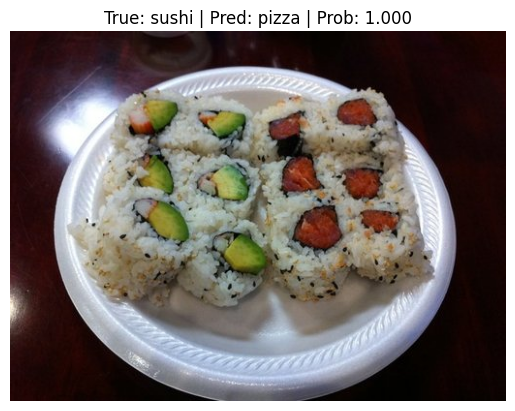

In [46]:
import torchvision
import matplotlib.pyplot as plt
# Plot the top 5 most wrong images
for row in top_5_most_wrong.iterrows():
    row = row[1]
    mage_path = row[0]
    true_label = row[1]
    pred_prob = row[2]
    pred_class = row[3]
    # Plot the image and various details
    img = torchvision.io.read_image(str(image_path)) # get image as tensor
    plt.figure()
    plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in [height, width, color_channels]
    plt.title(f"True: {true_label} | Pred: {pred_class} | Prob: {pred_prob:.3f}")
    plt.axis(False);



## 3] Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?


--2024-02-18 04:07:25--  https://images.unsplash.com/photo-1588315029754-2dd089d39a1a
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3208960 (3.1M) [image/jpeg]
Saving to: 'photo-1588315029754-2dd089d39a1a.1'

photo-1588315029754 100%[===================>]   3.06M  --.-KB/s    in 0.05s   

2024-02-18 04:07:25 (58.6 MB/s) - 'photo-1588315029754-2dd089d39a1a.1' saved [3208960/3208960]



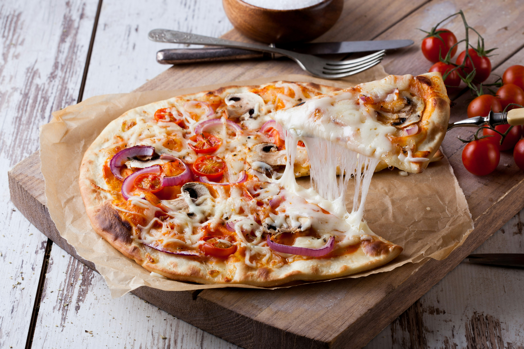

In [47]:
# Get an image of pizza/steak/sushi
!wget https://images.unsplash.com/photo-1588315029754-2dd089d39a1a 
!cp photo-1588315029754-2dd089d39a1a pizza.jpg

from PIL import Image

with Image.open("pizza.jpg") as img:
  # Reduce the image size and width by 10
  (width, height) = (img.width // 10, img.height // 10)
  img_resized = img.resize((width, height))

img_resized

In [48]:
# Make a function to pred and plot images
def pred_and_plot(image_path, model, transform, class_names, device=device):
  # open image
  image = Image.open(image_path)

  # transform image
  transformed_image = transform(image)

  # pred on image
  model.eval()
  with torch.inference_mode():
    pred_logit = model(transformed_image.unsqueeze(0).to(device))
    pred_label = torch.argmax(torch.softmax(pred_logit, dim=1), dim=1)
  
  # plot image and pred
  plt.figure() 
  plt.imshow(image)
  plt.title(f"Pred: {class_names[pred_label]}")
  plt.axis(False);

--2024-02-18 04:07:27--  https://images.unsplash.com/photo-1546964124-0cce460f38ef
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3617320 (3.4M) [image/jpeg]
Saving to: 'photo-1546964124-0cce460f38ef.5'

photo-1546964124-0c 100%[===================>]   3.45M  --.-KB/s    in 0.06s   

2024-02-18 04:07:27 (58.3 MB/s) - 'photo-1546964124-0cce460f38ef.5' saved [3617320/3617320]



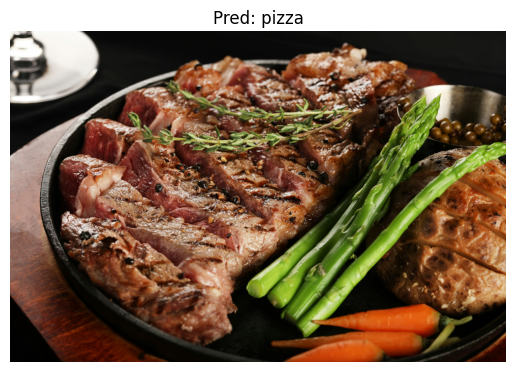

In [49]:
# Try again on a photo of steak from unsplash.com 
!wget https://images.unsplash.com/photo-1546964124-0cce460f38ef
!cp photo-1546964124-0cce460f38ef steak.jpg

pred_and_plot("steak.jpg",
              model=model_e,
              transform=simple_transform,
              class_names=class_names)

## 4] Train the model from section 4 above for longer (10 epochs should do), what happens to the performance?

--2024-02-18 04:07:35--  https://images.unsplash.com/photo-1546964124-0cce460f38ef
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3617320 (3.4M) [image/jpeg]
Saving to: 'photo-1546964124-0cce460f38ef.6'

photo-1546964124-0c 100%[===================>]   3.45M  --.-KB/s    in 0.04s   

2024-02-18 04:07:35 (79.0 MB/s) - 'photo-1546964124-0cce460f38ef.6' saved [3617320/3617320]



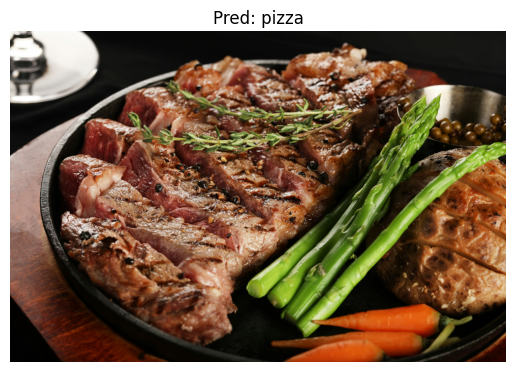

In [50]:
# Try again on a photo of steak from unsplash.com 
!wget https://images.unsplash.com/photo-1546964124-0cce460f38ef
!cp photo-1546964124-0cce460f38ef steak.jpg

pred_and_plot("steak.jpg",
              model=model_e,
              transform=simple_transform,
              class_names=class_names)
     

--2024-02-18 04:07:43--  https://images.unsplash.com/photo-1570913149827-d2ac84ab3f9a
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2006529 (1.9M) [image/jpeg]
Saving to: 'photo-1570913149827-d2ac84ab3f9a.1'

photo-1570913149827 100%[===================>]   1.91M  --.-KB/s    in 0.05s   

2024-02-18 04:07:43 (37.2 MB/s) - 'photo-1570913149827-d2ac84ab3f9a.1' saved [2006529/2006529]



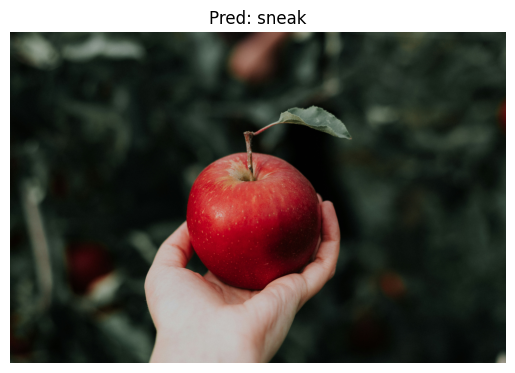

In [51]:
# Get an image of not pizza/steak/sushi
!wget https://images.unsplash.com/photo-1570913149827-d2ac84ab3f9a
!cp photo-1570913149827-d2ac84ab3f9a apple.jpg 

pred_and_plot(image_path="apple.jpg",
              model=model_e,
              transform=simple_transform,
              class_names=class_names)

In [52]:
torch.manual_seed(29)
torch.cuda.manual_seed(29)

from timeit import default_timer as timer
start_time=timer()

results=train(model=model_e,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=30)
end_time=timer()
print(end_time-start_time)

  0%|          | 0/30 [00:00<?, ?it/s]

epoch+1 | train_loss: 0.6137033130559656 | train_acc: 0.8177777777777778 | test_loss: 17.066353525682807 | test_acc: 0.24 
epoch+1 | train_loss: 0.6652582592434353 | train_acc: 0.8044444444444444 | test_loss: 14.493227711418372 | test_acc: 0.32 
epoch+1 | train_loss: 0.7159734935892953 | train_acc: 0.6933333333333334 | test_loss: 18.60560892610635 | test_acc: 0.25333333333333335 
epoch+1 | train_loss: 0.6901261855827437 | train_acc: 0.76 | test_loss: 8.106355243833992 | test_acc: 0.26666666666666666 
epoch+1 | train_loss: 0.637001882923974 | train_acc: 0.7777777777777778 | test_loss: 10.71660524542364 | test_acc: 0.24 
epoch+1 | train_loss: 0.8352146297362115 | train_acc: 0.6133333333333333 | test_loss: 9.914384089802644 | test_acc: 0.36 
epoch+1 | train_loss: 0.8971983820365534 | train_acc: 0.6044444444444445 | test_loss: 7.835606919049763 | test_acc: 0.37333333333333335 
epoch+1 | train_loss: 0.8297443294028441 | train_acc: 0.6177777777777778 | test_loss: 12.52253476098998 | test_acc

In [53]:


# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves


## 5] Train the model from section 4 above with more data, say 20% of the images from Food101 of Pizza, Steak and Sushi images.
- You can find the 20% Pizza, Steak, Sushi dataset on the course GitHub. It was created with the notebook extras/04_custom_data_creation.ipynb.

In [54]:
import os
import requests
import zipfile

from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"
image_data_zip_path = "pizza_steak_sushi_20_percent.zip"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / image_data_zip_path, "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / image_data_zip_path, "r") as zip_ref:
        print("Unzipping pizza, steak, sushi 20% data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / image_data_zip_path)

# Setup Dirs
train_dir_20_percent = image_path / "train"
test_dir_20_percent = image_path / "test"

train_dir_20_percent, test_dir_20_percent

data/pizza_steak_sushi_20_percent directory exists.


(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [55]:

# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [56]:
train_data=datasets.ImageFolder(root=train_dir_20_percent, # target folderof image
                                transform=data_transform, # 
                                target_transform=None)# transforms to perform on label (if necesary)
test_data=datasets.ImageFolder(root=test_dir_20_percent,
                               transform=data_transform)

In [57]:
train_dataloader_20_percent=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=1, # how many suprocess to usefor data loading?
                            shuffle=True)
test_dataloader_20_percent=DataLoader(dataset=test_data,
                           batch_size=1,
                           num_workers=1,
                           shuffle=False)
train_dataloader_20_percent, test_dataloader_20_percent

(<torch.utils.data.dataloader.DataLoader at 0x795d7c883640>,
 <torch.utils.data.dataloader.DataLoader at 0x795d77c287c0>)

In [58]:


# Create a new model for 20 percent of the data
model_2 = torchvision.models.efficientnet_b0(pretrained=True).to(device)

# Freeze all the base layers
for param in model_2.features.parameters():
  param.requires_grad = False

# Change the classifier head
torch.manual_seed(42)
model_2.classifier = nn.Sequential(
  nn.Dropout(p=0.2, inplace=True),
  nn.Linear(in_features=1280, out_features=3, bias=True)
).to(device) 

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [59]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
model_2_results = train(model=model_2,
                              train_dataloader=train_dataloader_20_percent,
                              test_dataloader=test_dataloader_20_percent,
                              optimizer=optimizer,
                              loss_fn=loss_fn,
                              epochs=20)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

epoch+1 | train_loss: 1.1575293285979165 | train_acc: 0.3466666666666667 | test_loss: 4.348097042356967 | test_acc: 0.30666666666666664 
epoch+1 | train_loss: 1.1303786698977152 | train_acc: 0.37333333333333335 | test_loss: 3.3199143865685135 | test_acc: 0.3333333333333333 
epoch+1 | train_loss: 1.1130180021458203 | train_acc: 0.3888888888888889 | test_loss: 3.3674215688419378 | test_acc: 0.32 
epoch+1 | train_loss: 1.1042567314041984 | train_acc: 0.38666666666666666 | test_loss: 3.4207244881229295 | test_acc: 0.43333333333333335 
epoch+1 | train_loss: 1.0911636627382701 | train_acc: 0.41333333333333333 | test_loss: 3.984219804067021 | test_acc: 0.38666666666666666 
epoch+1 | train_loss: 1.0975428760714 | train_acc: 0.4 | test_loss: 5.17456542329227 | test_acc: 0.32666666666666666 
epoch+1 | train_loss: 1.090770551164945 | train_acc: 0.4111111111111111 | test_loss: 3.569113015267624 | test_acc: 0.34 
epoch+1 | train_loss: 1.0887141905890572 | train_acc: 0.41555555555555557 | test_loss:

In [60]:

# Check results with 10% of data for 5 epochs
print(max(results["test_acc"]), min(results["test_loss"]))
     
# Check results with 20% of data for 5 epochs 
print(max(model_2_results["test_acc"]), min(model_2_results["test_loss"]))

0.38666666666666666 7.811852534478206
0.43333333333333335 3.3199143865685135


## 6] Try a different model from torchvision.models on the Pizza, Steak, Sushi data, how does this model perform?
- You'll have to change the size of the classifier layer to suit our problem.
- You may want to try an EfficientNet with a higher number than our B0, perhaps torchvision.models.efficientnet_b2()?

In [61]:
model_3=torchvision.models.efficientnet_b2(pretrained=True).to(device)


# Freeze the base layers
for param in model_3.parameters():
    param.requires_grad = False

# Change the classifier head (to suit our problem)
torch.manual_seed(42)
model_3.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(in_features=1408, out_features=len(class_names), bias=True)
).to(device)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
model_3_results = train(model=model_3,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              optimizer=optimizer,
                              loss_fn=loss_fn,
                              epochs=5,)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

epoch+1 | train_loss: 1.1649048223760392 | train_acc: 0.3422222222222222 | test_loss: 5.086881391738231 | test_acc: 0.32 
epoch+1 | train_loss: 1.15308003783226 | train_acc: 0.36 | test_loss: 4.950215219457295 | test_acc: 0.29333333333333333 
epoch+1 | train_loss: 1.1675976893636915 | train_acc: 0.3466666666666667 | test_loss: 4.413283451500659 | test_acc: 0.36 
epoch+1 | train_loss: 1.1738737201690674 | train_acc: 0.29777777777777775 | test_loss: 7.040583961107623 | test_acc: 0.36 
epoch+1 | train_loss: 1.154465534819497 | train_acc: 0.3333333333333333 | test_loss: 5.528415428295023 | test_acc: 0.30666666666666664 
[INFO] Total training time: 27.843 seconds


In [63]:
print(max(results["test_acc"]), min(results["test_loss"]))
     
# Check effnet_b0 results with 10% of data for 10 epochs (double training time)
print(max(model_3_results["test_acc"]), min(model_3_results["test_loss"]))

0.38666666666666666 7.811852534478206
0.36 4.413283451500659
